<a href="https://colab.research.google.com/github/yunhyeongil/docs-l10n/blob/master/%EC%B5%9C%EC%A2%85%EC%A0%9C%EC%B6%9C_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import warnings



warnings.filterwarnings(action='ignore') # Ignore warning message

# date path
data_path = './'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [3]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% compressed'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [4]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

62.5% compressed
38.6% compressed
54.2% compressed
39.9% compressed
70.8% compressed


In [5]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000000,1
1,03.01.2013,0,25,2552,899.000000,1
2,05.01.2013,0,25,2552,899.000000,-1
3,06.01.2013,0,25,2554,1709.050049,1
4,15.01.2013,0,25,2555,1099.000000,1


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [10]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [11]:
print(np.shape(sales_train))
print(np.shape(test))

(2935849, 6)
(214200, 3)


In [12]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [13]:
sum(sales_train.duplicated()), sum(test.duplicated()),sum(shops.duplicated()), sum(items.duplicated())

(6, 0, 0, 0)

In [14]:
sum(item_categories.duplicated()), sum(test.duplicated())

(0, 0)

In [15]:
sales_train[sales_train.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1
1435367,23.02.2014,13,50,3423,999.0,1
1496766,23.03.2014,14,21,3423,999.0,1
1671873,01.05.2014,16,50,3423,999.0,1
1866340,12.07.2014,18,25,3423,999.0,1
2198566,31.12.2014,23,42,21619,499.0,1


In [16]:
sales_train.drop_duplicates(inplace = True)

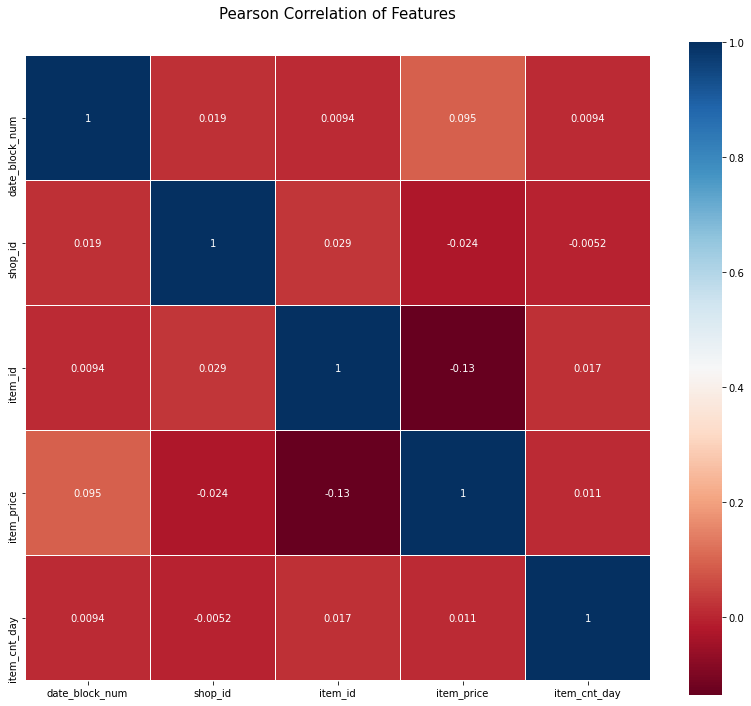

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(sales_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

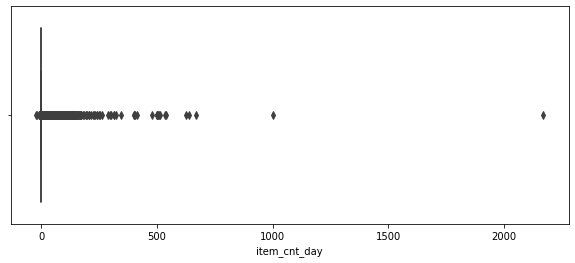

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_cnt_day)

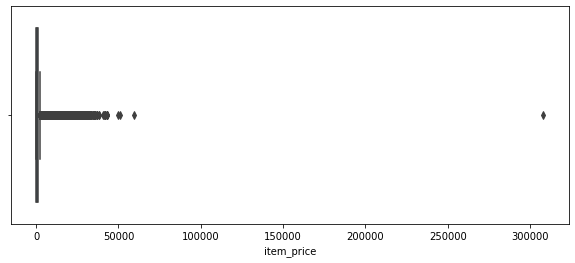

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_price)

In [20]:
# sns Theme 
sns.set_style('darkgrid') 

# 소수점 표현 제한
pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))

In [21]:
train_df = pd.DataFrame(sales_train)
train_df.describe(include="all")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935843,2935843.000,2935843.000,2935843.000,2935843.000,2935843.000
unique,1034,nan,nan,nan,nan,nan
top,28.12.2013,nan,nan,nan,nan,nan
freq,9434,nan,nan,nan,nan,nan
mean,NaN,14.570,33.002,10197.229,890.624,1.243
std,NaN,9.423,16.227,6324.293,1726.442,2.619
min,NaN,0.000,0.000,0.000,-1.000,-22.000
25%,NaN,7.000,22.000,4476.000,249.000,1.000
50%,NaN,14.000,31.000,9343.000,399.000,1.000
75%,NaN,23.000,47.000,15684.000,999.000,1.000


In [22]:
sales_train = sales_train[sales_train['item_price'] > 0]
sales_train = sales_train[sales_train['item_price'] < 50000]
sales_train = sales_train[sales_train['item_cnt_day']>0]
sales_train = sales_train[sales_train['item_cnt_day']<1000]

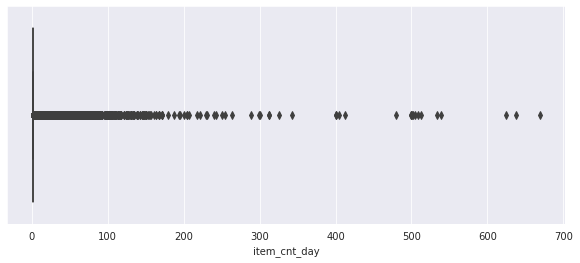

In [23]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_cnt_day)

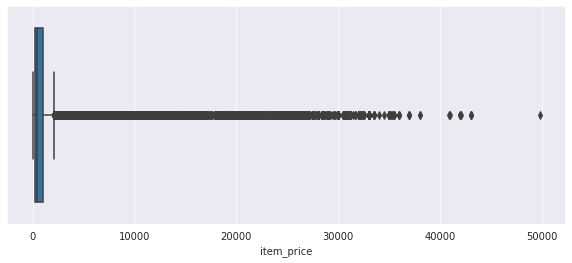

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_price)

### 2.3 데이터 통일성 확인
#### 여기서 이제 데이터를 이해하고 전체적인 값을 확인하는 것이 중요하다. 몇가지 작업을 해야한다. 현재 #### train 데이터에서 shop_id와 shop_name이 일치하지 않는 부분이 있다.

In [25]:

print(shops['shop_name'][0], '||', shops['shop_name'][57])
print(shops['shop_name'][1], '||', shops['shop_name'][58])
print(shops['shop_name'][10], '||', shops['shop_name'][11])
print(shops['shop_name'][39], '||', shops['shop_name'][40])

#  Modify shop_id in sales_train data
sales_train.loc[sales_train['shop_id'] == 0, 'shop_id'] = 57
sales_train.loc[sales_train['shop_id'] == 1, 'shop_id'] = 58
sales_train.loc[sales_train['shop_id'] == 10, 'shop_id'] = 11
sales_train.loc[sales_train['shop_id'] == 39, 'shop_id'] = 40

#  Modify shop_id in test data
test.loc[test['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 39, 'shop_id'] = 40

!Якутск Орджоникидзе, 56 фран || Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [26]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [27]:
# Leaking to imporve performance
unique_test_shop_id = test['shop_id'].unique()
sales_train = sales_train[sales_train['shop_id'].isin(unique_test_shop_id)]

shops['city'] = shops['shop_name'].apply(lambda x: x.split()[0])
shops['city'].unique()

shops.loc[shops['city'] =='!Якутск', 'city'] = 'Якутск'


In [28]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [29]:
from sklearn.preprocessing import LabelEncoder

# Create Label Encoder
label_encoder = LabelEncoder()
# City Feature Label Encoding 
shops['city'] = label_encoder.fit_transform(shops['city'])
# Remove shop_name feature
shops = shops.drop('shop_name', axis=1)

shops.head()


,shop_id,city
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [30]:
# Remove item_name feature
items = items.drop(['item_name'], axis=1)
# Create the date the product was first sold as a feature
items['first_sale_date'] = sales_train.groupby('item_id').agg({'date_block_num': 'min'})['date_block_num']

items.head()
items[items['first_sale_date'].isna()]

# Replace NaN of first_sale_date with 34 첫번째 팔린 날짜
items['first_sale_date'] = items['first_sale_date'].fillna(34)

In [31]:
sales_train.groupby('item_id').agg({'date_block_num': 'min'})

,date_block_num
item_id,
1,15
16,20
17,20
18,19
19,0
...,...
22165,7
22166,9
22167,8


In [32]:

# Extract the first word of the item_categories_name into category
item_categories['category'] = item_categories['item_category_name'].apply(lambda x: x.split()[0])  
item_categories['category'].value_counts()

def make_etc(x):
    if len(item_categories[item_categories['category']==x]) >= 5:
        return x
    else:
        return 'etc'

# Replace with 'etc' if category count is less than 5
item_categories['category'] = item_categories['category'].apply(make_etc)
item_categories.head()

# Create Label Encoder
label_encoder = LabelEncoder()
# Category Feature Label Encoding 
item_categories['category'] = label_encoder.fit_transform(item_categories['category'])

# Remove item_category_name feature
item_categories = item_categories.drop('item_category_name', axis=1)


In [33]:
item_categories.head()

,item_category_id,category
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [34]:
from itertools import product

train = []
# Create date_block_num, sop_id, item_id combination
for i in sales_train['date_block_num'].unique():
    all_shop = sales_train.loc[sales_train['date_block_num']==i, 'shop_id'].unique()
    all_item = sales_train.loc[sales_train['date_block_num']==i, 'item_id'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))
    

idx_features = ['date_block_num', 'shop_id', 'item_id'] # base features
train = pd.DataFrame(np.vstack(train), columns=idx_features)
group = sales_train.groupby(idx_features).agg({'item_cnt_day': 'sum',
                                               'item_price': 'mean'})
group = group.reset_index()
group = group.rename(columns={'item_cnt_day': 'item_cnt_month', 'item_price': 'item_price_mean'})

train = train.merge(group, on=idx_features, how='left')

train.head()


,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean
0,0,59,22154,1.000,999.000
1,0,59,2552,nan,nan
2,0,59,2554,nan,nan
3,0,59,2555,nan,nan
4,0,59,2564,nan,nan


In [35]:
import gc

# group variable garbage collection
del group
gc.collect();
# Add a feature for the number of items sold
group = sales_train.groupby(idx_features).agg({'item_cnt_day': 'count'})
group = group.reset_index()
group = group.rename(columns={'item_cnt_day': 'item_count'})

train = train.merge(group, on=idx_features, how='left')

# Garbage collection
del group, sales_train
gc.collect()

train.head()

# Set test data date_block_num to 34
test['date_block_num'] = 34


# Concatenate train and test
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)
# Replace NaN with 0
all_data = all_data.fillna(0)

all_data.head()

# Merge other data
all_data = all_data.merge(shops, on='shop_id', how='left')
all_data = all_data.merge(items, on='item_id', how='left')
all_data = all_data.merge(item_categories, on='item_category_id', how='left')

# Data downcasting
all_data = downcast(all_data)

# Garbage collection
del shops, items, item_categories
gc.collect();

def resumetable(df):
    print(f'Data Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Dtypes'])
    summary['Null'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First_values'] = df.loc[0].values
    summary['Second_values'] = df.loc[1].values
    summary['Third_values'] = df.loc[2].values
    
    return summary
resumetable(all_data)



64.6% compressed
Data Shape: (8856961, 10)


,Dtypes,Null,Uniques,First_values,Second_values,Third_values
date_block_num,int8,0,35,0.000,0.000,0.000
shop_id,int8,0,42,59.000,59.000,59.000
item_id,int16,0,21464,22154.000,2552.000,2554.000
item_cnt_month,int16,0,407,1.000,0.000,0.000
item_price_mean,float32,0,34147,999.000,0.000,0.000
item_count,int8,0,40,1.000,0.000,0.000
city,int8,0,28,30.000,30.000,30.000
item_category_id,int8,0,84,37.000,58.000,58.000
first_sale_date,int8,0,35,0.000,0.000,0.000
category,int8,0,10,5.000,7.000,7.000


In [36]:
all_data.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category
0,0,59,22154,1,999.000,1,30,37,0,5
1,0,59,2552,0,0.000,0,30,58,0,7
2,0,59,2554,0,0.000,0,30,58,0,7
3,0,59,2555,0,0.000,0,30,56,0,7
4,0,59,2564,0,0.000,0,30,59,0,7


In [37]:
all_data.groupby('date_block_num').agg({'item_cnt_month': 'sum'})

,item_cnt_month
date_block_num,
0,100718.000
1,100207.000
2,114905.000
3,84189.000
4,85763.000
5,103566.000
6,94986.000
7,101691.000
8,107568.000


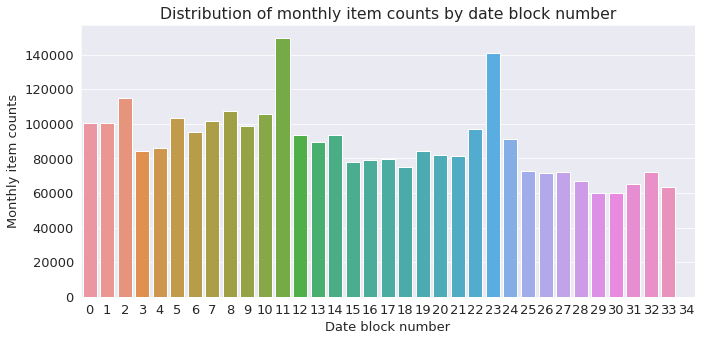

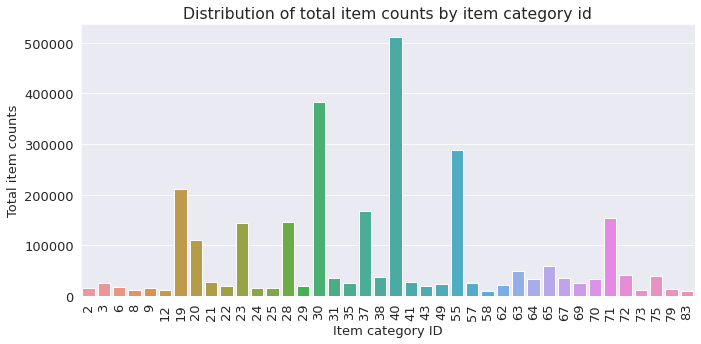

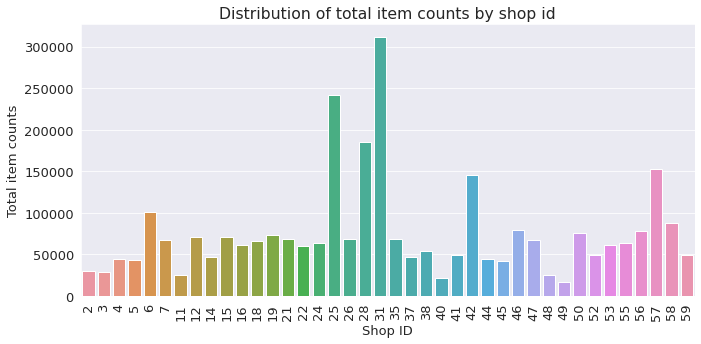

In [38]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=13)
figure, ax = plt.subplots() 
figure.set_size_inches(11, 5)

# total montly item sales
group_month_sum = all_data.groupby('date_block_num').agg({'item_cnt_month': 'sum'})
group_month_sum = group_month_sum.reset_index()

sns.barplot(x='date_block_num', y='item_cnt_month', data=group_month_sum)
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel='Date block number', 
       ylabel='Monthly item counts');

figure, ax= plt.subplots() 
figure.set_size_inches(11, 5)

# Total item sales by item_category_id
group_cat_sum = all_data.groupby('item_category_id').agg({'item_cnt_month': 'sum'})
group_cat_sum = group_cat_sum.reset_index()

# Extract only item categories with total sales > 10,000
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_month'] > 10000]

sns.barplot(x='item_category_id', y='item_cnt_month', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
       xlabel='Item category ID', 
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # Rotate X label

figure, ax= plt.subplots() 
figure.set_size_inches(11, 5)

# Total item sales by shop_id
group_shop_sum = all_data.groupby('shop_id').agg({'item_cnt_month': 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_month'] > 10000]

sns.barplot(x='shop_id', y='item_cnt_month', data=group_shop_sum)
ax.set(title='Distribution of total item counts by shop id',
       xlabel='Shop ID', 
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)

In [39]:
#all_data, item_mean_features = add_mean_features(df=all_data,
#                                                 mean_features=item_mean_features,
#                                                 idx_features=['date_block_num', 'item_id'])

def add_mean_features(df, mean_features, idx_features):
    # Check base features
    assert (idx_features[0] == 'date_block_num') and \
           len(idx_features) in [2, 3]
    
    # Set derived feature name 
    if len(idx_features) == 2:
        feature_name = idx_features[1] + '_mean_sales'
    else:
        feature_name = idx_features[1] + '_' + idx_features[2] + '_mean_sales'
    
    # Get average monthly sales by grouping based on base features
    group = df.groupby(idx_features).agg({'item_cnt_month': 'mean'})
    group = group.reset_index()
    group = group.rename(columns={'item_cnt_month': feature_name})
    
    # Merge df with group based on idx_features
    df = df.merge(group, on=idx_features, how='left')
    # Date downcasting
    df = downcast(df, False)
    # Append newly created mean_feature_name features to the mean_features list
    mean_features.append(feature_name)
    # Garbage collection
    del group
    gc.collect()
    
    return df, mean_features

In [40]:
all_data.describe()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category
count,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000
mean,16.019,31.019,11250.661,0.341,121.119,0.274,15.208,44.834,6.229,5.563
std,9.977,17.923,6216.085,3.387,661.657,1.008,8.358,15.272,8.508,1.826
min,0.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7.000,15.000,5859.000,0.000,0.000,0.000,9.000,37.000,0.000,5.000
50%,15.000,31.000,11344.000,0.000,0.000,0.000,13.000,40.000,1.000,5.000
75%,24.000,47.000,16533.000,0.000,0.000,0.000,22.000,55.000,11.000,7.000
max,34.000,59.000,22169.000,1644.000,49782.000,57.000,30.000,83.000,34.000,9.000


In [41]:
# List of derived features containing 'item_id' in the grouping base features
item_mean_features = []


# Create monthly average sales derived features grouped by ['date_block_num', 'item_id']
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['date_block_num', 'item_id'])

In [42]:
item_mean_features

['item_id_mean_sales']

In [43]:
all_data.describe()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category,item_id_mean_sales
count,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000
mean,16.019,31.019,11250.661,0.341,121.119,0.274,15.208,44.834,6.229,5.563,0.330
std,9.977,17.923,6216.085,3.387,661.657,1.008,8.358,15.272,8.508,1.826,2.038
min,0.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7.000,15.000,5859.000,0.000,0.000,0.000,9.000,37.000,0.000,5.000,0.028
50%,15.000,31.000,11344.000,0.000,0.000,0.000,13.000,40.000,1.000,5.000,0.086
75%,24.000,47.000,16533.000,0.000,0.000,0.000,22.000,55.000,11.000,7.000,0.244
max,34.000,59.000,22169.000,1644.000,49782.000,57.000,30.000,83.000,34.000,9.000,267.868


In [44]:
# Create monthly average sales derived features grouped by ['date_block_num', 'item_id', 'city']
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['date_block_num', 'item_id', 'city'])

item_mean_features


['item_id_mean_sales', 'item_id_city_mean_sales']

In [45]:
# List of derived features containing 'shop_id' in the grouping base features
shop_mean_features = []

# Create monthly average sales derived features grouped by ['date_block_num', 'shop_id', 'item_category_id']
all_data, shop_mean_features = add_mean_features(df=all_data, 
                                                 mean_features=shop_mean_features,
                                                 idx_features=['date_block_num', 'shop_id', 'item_category_id'])
shop_mean_features

['shop_id_item_category_id_mean_sales']

In [46]:
#all_data, lag_features_to_clip = add_lag_features(df=all_data, 
#                                                  lag_features_to_clip=lag_features_to_clip,
#                                                  idx_features=idx_features,
#                                                  lag_feature='item_cnt_month', 
#                                                  nlags=3,
#                                                  clip=True)



def add_lag_features(df, lag_features_to_clip, idx_features, 
                     lag_feature, nlags=3, clip=False):
    # Copy only the part of the DataFrame needed to create the lag features
    df_temp = df[idx_features + [lag_feature]].copy() 

    # Create lag features
    for i in range(1, nlags+1):
        # Lag featrue name -> 'item_cnt_month'
        lag_feature_name = lag_feature +'_lag' + str(i)
        # Set df_temp column name --> ['date_block_num', 'shop_id', 'item_id'] + item_cnt_month
        df_temp.columns = idx_features + [lag_feature_name]
        # Add 1 to date_block_num feature in df_temp
        df_temp['date_block_num'] += i
       
        
        # Merge df with df_temp based on idx_feature
        df = df.merge(df_temp.drop_duplicates(), 
                      on=idx_features, 
                      how='left')
        # Replace NaN with 0
        df[lag_feature_name] = df[lag_feature_name].fillna(0)
        # Add lag features to lag_features_to_clip to clip between 0 and 20
        if clip: 
            lag_features_to_clip.append(lag_feature_name)
    # Date downcasting
    df = downcast(df, False)
    # Garbage collection
    del df_temp
    gc.collect()
    
    return df, lag_features_to_clip

In [47]:
#idx_features = ['date_block_num', 'shop_id', 'item_id']

lag_features_to_clip = [] # list of lag features to be clipped to between 0 to 20 
idx_features = ['date_block_num', 'shop_id', 'item_id'] # base features
# Create 3 month lag features of item_cnt_month based on idx_features

all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='item_cnt_month', 
                                                  nlags=3,
                                                  clip=True)
all_data.head().T

lag_features_to_clip

['item_cnt_month_lag1', 'item_cnt_month_lag2', 'item_cnt_month_lag3']

In [48]:
all_data.head().T

,0,1,2,3,4
date_block_num,0.000,0.000,0.000,0.000,0.000
shop_id,59.000,59.000,59.000,59.000,59.000
item_id,22154.000,2552.000,2554.000,2555.000,2564.000
item_cnt_month,1.000,0.000,0.000,0.000,0.000
item_price_mean,999.000,0.000,0.000,0.000,0.000
item_count,1.000,0.000,0.000,0.000,0.000
city,30.000,30.000,30.000,30.000,30.000
item_category_id,37.000,58.000,58.000,56.000,59.000
first_sale_date,0.000,0.000,0.000,0.000,0.000
category,5.000,7.000,7.000,7.000,7.000


In [49]:
item_mean_features

['item_id_mean_sales', 'item_id_city_mean_sales']

In [50]:
# Create 3 month lag features of item_count feature based on idx_features
all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='item_count', 
                                                  nlags=3)

# Create 3 month lag features of item_price_mean feature based on idx_features
all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='item_price_mean', 
                                                  nlags=3)
X_test_temp = all_data[all_data['date_block_num'] == 34]
X_test_temp[item_mean_features].sum()

item_id_mean_sales        0.000
item_id_city_mean_sales   0.000
dtype: float32

In [51]:
X_test_temp[item_mean_features]

,item_id_mean_sales,item_id_city_mean_sales
8642761,0.000,0.000
8642762,0.000,0.000
8642763,0.000,0.000
8642764,0.000,0.000
8642765,0.000,0.000
...,...,...
8856956,0.000,0.000
8856957,0.000,0.000
8856958,0.000,0.000
8856959,0.000,0.000


In [52]:
# Create lag features by item_mean_features element based on dx_features
for item_mean_feature in item_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                      lag_features_to_clip=lag_features_to_clip, 
                                                      idx_features=idx_features, 
                                                      lag_feature=item_mean_feature, 
                                                      nlags=3)
# Remove features in item_mean_features
all_data = all_data.drop(item_mean_features, axis=1)
shop_mean_features

['shop_id_item_category_id_mean_sales']

In [53]:
# Create lag features by shop_mean_features element based on ['date_block_num', 'shop_id', 'item_category_id']
for shop_mean_feature in shop_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                      lag_features_to_clip=lag_features_to_clip, 
                                                      idx_features=['date_block_num', 'shop_id', 'item_category_id'], 
                                                      lag_feature=shop_mean_feature, 
                                                      nlags=3)

In [54]:
lag_features_to_clip

['item_cnt_month_lag1', 'item_cnt_month_lag2', 'item_cnt_month_lag3']

In [55]:
all_data.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category,shop_id_item_category_id_mean_sales,item_cnt_month_lag1,item_cnt_month_lag2,item_cnt_month_lag3,item_count_lag1,item_count_lag2,item_count_lag3,item_price_mean_lag1,item_price_mean_lag2,item_price_mean_lag3,item_id_mean_sales_lag1,item_id_mean_sales_lag2,item_id_mean_sales_lag3,item_id_city_mean_sales_lag1,item_id_city_mean_sales_lag2,item_id_city_mean_sales_lag3,shop_id_item_category_id_mean_sales_lag1,shop_id_item_category_id_mean_sales_lag2,shop_id_item_category_id_mean_sales_lag3
0,0,59,22154,1,999.000,1,30,37,0,5,0.097,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0,59,2552,0,0.000,0,30,58,0,7,0.000,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0,59,2554,0,0.000,0,30,58,0,7,0.000,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,59,2555,0,0.000,0,30,56,0,7,0.011,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0,59,2564,0,0.000,0,30,59,0,7,0.013,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [56]:
all_data[all_data['date_block_num'] < 3].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            827186, 827187, 827188, 827189, 827190, 827191, 827192, 827193,
            827194, 827195],
           dtype='int64', length=827196)

In [57]:
# Remove features in shop_mean_features
all_data = all_data.drop(shop_mean_features, axis=1)
# Remove data less than date ID 3
all_data = all_data.drop(all_data[all_data['date_block_num'] < 3].index)

all_data['item_cnt_month_lag_mean'] = all_data[['item_cnt_month_lag1',
                                         'item_cnt_month_lag2', 
                                         'item_cnt_month_lag3']].mean(axis=1)

In [58]:
all_data[['item_cnt_month_lag1', 'item_cnt_month_lag2', 'item_cnt_month_lag3','item_cnt_month']]

,item_cnt_month_lag1,item_cnt_month_lag2,item_cnt_month_lag3,item_cnt_month
827196,1,4,0,3
827197,5,6,0,3
827198,0,0,0,3
827199,1,0,0,1
827200,0,0,0,1
...,...,...,...,...
8856956,1,0,0,0
8856957,0,0,0,0
8856958,0,0,0,0
8856959,0,0,0,0


In [59]:
all_data['date_block_num']

827196      3
827197      3
827198      3
827199      3
827200      3
           ..
8856956    34
8856957    34
8856958    34
8856959    34
8856960    34
Name: date_block_num, Length: 8029765, dtype: int8

In [60]:
# Clip 0~20
all_data[lag_features_to_clip + ['item_cnt_month', 'item_cnt_month_lag_mean']] = all_data[lag_features_to_clip +['item_cnt_month', 'item_cnt_month_lag_mean']].clip(0, 20)
all_data['lag_grad1'] = all_data['item_cnt_month_lag1']/all_data['item_cnt_month_lag2']
all_data['lag_grad1'] = all_data['lag_grad1'].replace([np.inf, -np.inf], 
                                                        np.nan).fillna(0)

all_data['lag_grad2'] = all_data['item_cnt_month_lag2']/all_data['item_cnt_month_lag3']
all_data['lag_grad2'] = all_data['lag_grad2'].replace([np.inf, -np.inf], 
                                                        np.nan).fillna(0)
all_data['brand_new'] = all_data['first_sale_date'] == all_data['date_block_num']

all_data['duration_after_first_sale'] = all_data['date_block_num'] - all_data['first_sale_date']
all_data = all_data.drop('first_sale_date', axis=1)
all_data['month'] = all_data['date_block_num']%12
# Remove item_price_mean, item_count features
all_data = all_data.drop(['item_price_mean', 'item_count'], axis=1)
all_data = downcast(all_data, False) # Data downcasting
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8029765 entries, 827196 to 8856960
Data columns (total 31 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   date_block_num                            int8   
 1   shop_id                                   int8   
 2   item_id                                   int16  
 3   item_cnt_month                            int8   
 4   city                                      int8   
 5   item_category_id                          int8   
 6   category                                  int8   
 7   item_cnt_month_lag1                       int8   
 8   item_cnt_month_lag2                       int8   
 9   item_cnt_month_lag3                       int8   
 10  item_count_lag1                           int8   
 11  item_count_lag2                           int8   
 12  item_count_lag3                           int8   
 13  item_price_mean_lag1                      float32
 1

In [61]:
all_data

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,category,item_cnt_month_lag1,item_cnt_month_lag2,item_cnt_month_lag3,item_count_lag1,item_count_lag2,item_count_lag3,item_price_mean_lag1,item_price_mean_lag2,item_price_mean_lag3,item_id_mean_sales_lag1,item_id_mean_sales_lag2,item_id_mean_sales_lag3,item_id_city_mean_sales_lag1,item_id_city_mean_sales_lag2,item_id_city_mean_sales_lag3,shop_id_item_category_id_mean_sales_lag1,shop_id_item_category_id_mean_sales_lag2,shop_id_item_category_id_mean_sales_lag3,item_cnt_month_lag_mean,lag_grad1,lag_grad2,brand_new,duration_after_first_sale,month
827196,3,25,8092,3,13,40,5,1,4,0,1,4,0,149.000,149.000,0.000,0.667,1.429,0.000,1.000,2.143,0.000,1.087,1.049,0.000,1.667,0.250,0.000,0,3,3
827197,3,25,7850,3,13,30,3,5,6,0,4,5,0,199.000,199.000,0.000,2.000,3.114,0.000,3.714,2.286,0.000,3.654,2.279,0.000,3.667,0.833,0.000,0,3,3
827198,3,25,8051,3,13,66,8,0,0,0,0,0,0,0.000,0.000,0.000,0.028,0.086,0.000,0.000,0.429,0.000,1.828,1.389,0.000,0.000,0.000,0.000,0,3,3
827199,3,25,8088,1,13,55,7,1,0,0,1,0,0,199.000,0.000,0.000,0.111,0.086,0.000,0.286,0.000,0.000,0.600,0.562,0.000,0.333,0.000,0.000,0,3,3
827200,3,25,8089,1,13,55,7,0,0,0,0,0,0,0.000,0.000,0.000,0.361,0.200,0.000,0.571,0.000,0.000,0.600,0.562,0.000,0.000,0.000,0.000,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856956,34,45,18454,0,20,55,7,1,0,0,1,0,0,99.000,0.000,0.000,0.048,0.073,0.585,0.500,0.000,0.000,0.127,0.106,0.128,0.333,0.000,0.000,0,11,10
8856957,34,45,16188,0,20,64,8,0,0,0,0,0,0,0.000,0.000,0.000,0.024,0.000,0.000,0.000,0.000,0.000,0.094,0.220,0.102,0.000,0.000,0.000,0,2,10
8856958,34,45,15757,0,20,55,7,0,0,0,0,0,0,0.000,0.000,0.000,0.119,0.098,0.244,0.000,0.000,0.000,0.127,0.106,0.128,0.000,0.000,0.000,0,34,10
8856959,34,45,19648,0,20,40,5,0,0,0,0,0,0,0.000,0.000,0.000,0.048,0.146,0.098,0.000,0.000,0.000,0.084,0.112,0.083,0.000,0.000,0.000,0,11,10


In [62]:
np.shape(all_data)

(8029765, 31)

In [63]:
len(all_data[all_data['date_block_num'] == 33])

221718

In [64]:
len(all_data[all_data['date_block_num'] == 34])

214200

In [65]:
len(all_data[all_data['date_block_num'] == 34])

214200

In [66]:
all_data

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,category,item_cnt_month_lag1,item_cnt_month_lag2,item_cnt_month_lag3,item_count_lag1,item_count_lag2,item_count_lag3,item_price_mean_lag1,item_price_mean_lag2,item_price_mean_lag3,item_id_mean_sales_lag1,item_id_mean_sales_lag2,item_id_mean_sales_lag3,item_id_city_mean_sales_lag1,item_id_city_mean_sales_lag2,item_id_city_mean_sales_lag3,shop_id_item_category_id_mean_sales_lag1,shop_id_item_category_id_mean_sales_lag2,shop_id_item_category_id_mean_sales_lag3,item_cnt_month_lag_mean,lag_grad1,lag_grad2,brand_new,duration_after_first_sale,month
827196,3,25,8092,3,13,40,5,1,4,0,1,4,0,149.000,149.000,0.000,0.667,1.429,0.000,1.000,2.143,0.000,1.087,1.049,0.000,1.667,0.250,0.000,0,3,3
827197,3,25,7850,3,13,30,3,5,6,0,4,5,0,199.000,199.000,0.000,2.000,3.114,0.000,3.714,2.286,0.000,3.654,2.279,0.000,3.667,0.833,0.000,0,3,3
827198,3,25,8051,3,13,66,8,0,0,0,0,0,0,0.000,0.000,0.000,0.028,0.086,0.000,0.000,0.429,0.000,1.828,1.389,0.000,0.000,0.000,0.000,0,3,3
827199,3,25,8088,1,13,55,7,1,0,0,1,0,0,199.000,0.000,0.000,0.111,0.086,0.000,0.286,0.000,0.000,0.600,0.562,0.000,0.333,0.000,0.000,0,3,3
827200,3,25,8089,1,13,55,7,0,0,0,0,0,0,0.000,0.000,0.000,0.361,0.200,0.000,0.571,0.000,0.000,0.600,0.562,0.000,0.000,0.000,0.000,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856956,34,45,18454,0,20,55,7,1,0,0,1,0,0,99.000,0.000,0.000,0.048,0.073,0.585,0.500,0.000,0.000,0.127,0.106,0.128,0.333,0.000,0.000,0,11,10
8856957,34,45,16188,0,20,64,8,0,0,0,0,0,0,0.000,0.000,0.000,0.024,0.000,0.000,0.000,0.000,0.000,0.094,0.220,0.102,0.000,0.000,0.000,0,2,10
8856958,34,45,15757,0,20,55,7,0,0,0,0,0,0,0.000,0.000,0.000,0.119,0.098,0.244,0.000,0.000,0.000,0.127,0.106,0.128,0.000,0.000,0.000,0,34,10
8856959,34,45,19648,0,20,40,5,0,0,0,0,0,0,0.000,0.000,0.000,0.048,0.146,0.098,0.000,0.000,0.000,0.084,0.112,0.083,0.000,0.000,0.000,0,11,10


In [67]:
'''
# Train data (Features)
X_train = all_data[all_data['date_block_num'] < 33]
X_train = X_train.drop(['item_cnt_month'], axis=1)
# Valid data (Features)
X_valid = all_data[all_data['date_block_num'] == 33]
X_valid = X_valid.drop(['item_cnt_month'], axis=1)
# Test data (Features)
X_test = all_data[all_data['date_block_num'] == 34]
X_test = X_test.drop(['item_cnt_month'], axis=1)

# Train data (Target values)
y_train = all_data[all_data['date_block_num'] < 33]['item_cnt_month']
# Valid data (Target values)
y_valid = all_data[all_data['date_block_num'] == 33]['item_cnt_month']
'''


X_train = all_data[all_data['date_block_num'] <= 33]
X_train = X_train.drop(['item_cnt_month'], axis=1)

X_test = all_data[all_data['date_block_num'] == 34]
X_test = X_test.drop(['item_cnt_month'], axis=1)

y_train = all_data[all_data['date_block_num'] <= 33]['item_cnt_month']

In [68]:
# Garbage collection
#del all_data
#gc.collect();
'''
import lightgbm as lgb

# lgb hyper-parameters
params = {'metric': 'rmse',
          'num_leaves': 255,
          'learning_rate': 0.005,
          'feature_fraction': 0.75,
          'bagging_fraction': 0.75,
          'bagging_freq': 5,
          'force_col_wise' : True,
          'random_state': 10}

cat_features = ['shop_id', 'city', 'item_category_id', 'category', 'month']

# lgb train and valid dataset
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)
 
# Train LightGBM model
lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=1500,
                      valid_sets=(dtrain, dvalid),
                      early_stopping_rounds=150,
                      categorical_feature=cat_features,
                      verbose_eval=100)      

preds = lgb_model.predict(X_test).clip(0,20)

submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)
'''
#del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
#gc.collect();

"\nimport lightgbm as lgb\n\n# lgb hyper-parameters\nparams = {'metric': 'rmse',\n          'num_leaves': 255,\n          'learning_rate': 0.005,\n          'feature_fraction': 0.75,\n          'bagging_fraction': 0.75,\n          'bagging_freq': 5,\n          'force_col_wise' : True,\n          'random_state': 10}\n\ncat_features = ['shop_id', 'city', 'item_category_id', 'category', 'month']\n\n# lgb train and valid dataset\ndtrain = lgb.Dataset(X_train, y_train)\ndvalid = lgb.Dataset(X_valid, y_valid)\n \n# Train LightGBM model\nlgb_model = lgb.train(params=params,\n                      train_set=dtrain,\n                      num_boost_round=1500,\n                      valid_sets=(dtrain, dvalid),\n                      early_stopping_rounds=150,\n                      categorical_feature=cat_features,\n                      verbose_eval=100)      \n\npreds = lgb_model.predict(X_test).clip(0,20)\n\nsubmission['item_cnt_month'] = preds\nsubmission.to_csv('submission.csv', index=Fal



*   추가



In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore') # warnings 무시
%matplotlib inline

# sns Theme 
sns.set_style('darkgrid') 

# 소수점 표현 제한
pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))

0.2981797101160495 1.2132245222556743


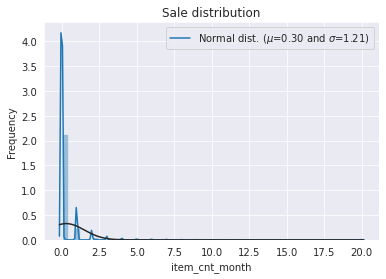

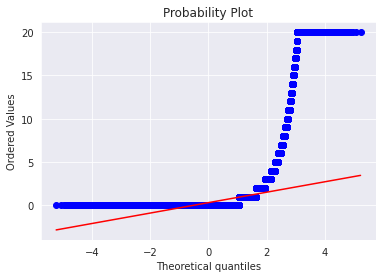

In [70]:
sns.distplot(all_data['item_cnt_month'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(all_data['item_cnt_month'])
print(mu, sigma)

# 분포를 그래프에 그려봅시다
plt.legend(['Normal dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Sale distribution')

# QQ-plot을 그려봅시다.
fig = plt.figure()
res = stats.probplot(all_data['item_cnt_month'], plot=plt)
plt.show()

0.141 0.3813


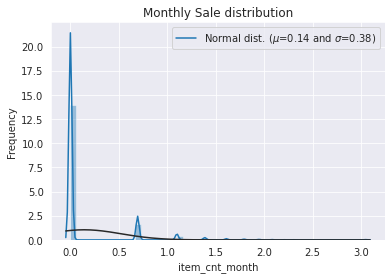

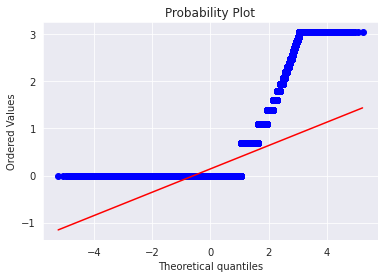

In [71]:
all_data['item_cnt_month'] = np.log1p(all_data['item_cnt_month'])

# 위에서와 같은 코드로 똑같이 분포를 확인해봅니다.
sns.distplot(all_data['item_cnt_month'], fit=norm)
(mu, sigma) = norm.fit(all_data['item_cnt_month'])
print(mu, sigma)
plt.legend(['Normal dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Monthly Sale distribution')
fig = plt.figure()
res = stats.probplot(all_data['item_cnt_month'], plot=plt)
plt.show()

In [72]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [73]:
# Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

In [74]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [75]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [76]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                   max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)

In [77]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [78]:

cat_features = ['shop_id', 'city', 'item_category_id', 'category', 'month']

# Train LightGBM model

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              early_stopping_rounds=150,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6,
                              categorical_feature=cat_features,
                              verbose_eval=100,
                              min_sum_hessian_in_leaf = 11)

In [1]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

NameError: ignored